In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('train.csv',usecols=['Survived','Pclass','Sex','Age','Fare','Embarked'])

In [3]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [5]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [6]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\bhavs\AppData\Local\Temp\ipykernel_22912\1110893864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\bhavs\AppData\Local\Temp\ipykernel_22912\1110893864.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [8]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [9]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False -> "return a normal array, not a sparse matrix"

fit()

Learns all unique categories in the column
Example Embarked has 3 categories

transform()

Converts them into binary columns:

In [10]:
encoded = ohe.fit_transform(df[['Embarked']])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Embarked'])) #Converting arry to Dataframe

df = pd.concat([df, encoded_df],axis=1)
df.drop('Embarked', axis=1, inplace=True)

In [11]:
encoded_gander = ohe.fit_transform(df[['Sex']])

encoded_gander_df = pd.DataFrame(encoded_gander, columns=ohe.get_feature_names_out(['Sex']))

df = pd.concat([df,encoded_gander_df],axis=1)
df.drop('Sex', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked_C  891 non-null    float64
 5   Embarked_Q  891 non-null    float64
 6   Embarked_S  891 non-null    float64
 7   Sex_female  891 non-null    float64
 8   Sex_male    891 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 62.8 KB


In [13]:
df

,Survived,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.000000,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.000000,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.000000,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.000000,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.000000,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0.0,0.0,1.0,0.0,1.0
887,1,1,19.000000,30.0000,0.0,0.0,1.0,1.0,0.0
888,0,3,29.699118,23.4500,0.0,0.0,1.0,1.0,0.0
889,1,1,26.000000,30.0000,1.0,0.0,0.0,0.0,1.0


In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\bhavs\AppData\Local\Temp\ipykernel_22912\2835767347.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],kde=True)


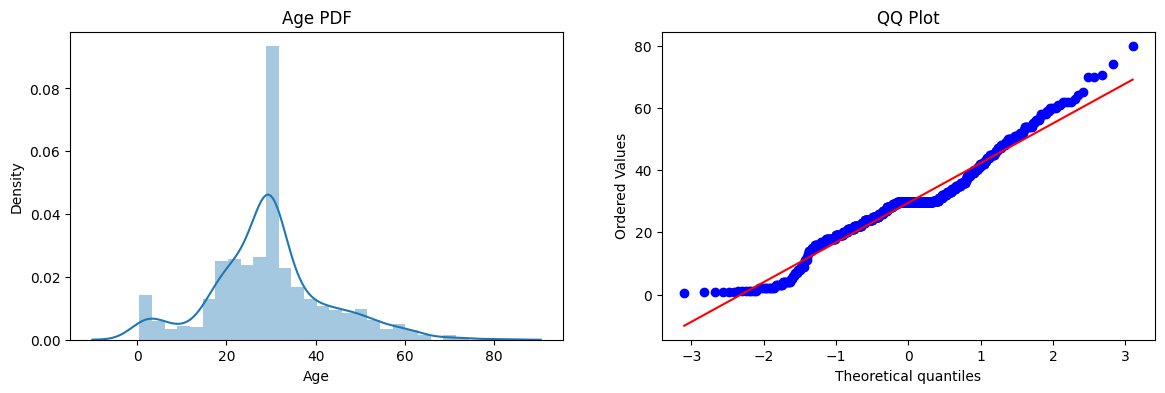

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('QQ Plot')

plt.show()

#Sort of normal but not perfect

C:\Users\bhavs\AppData\Local\Temp\ipykernel_22912\3915026639.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'],kde=True)


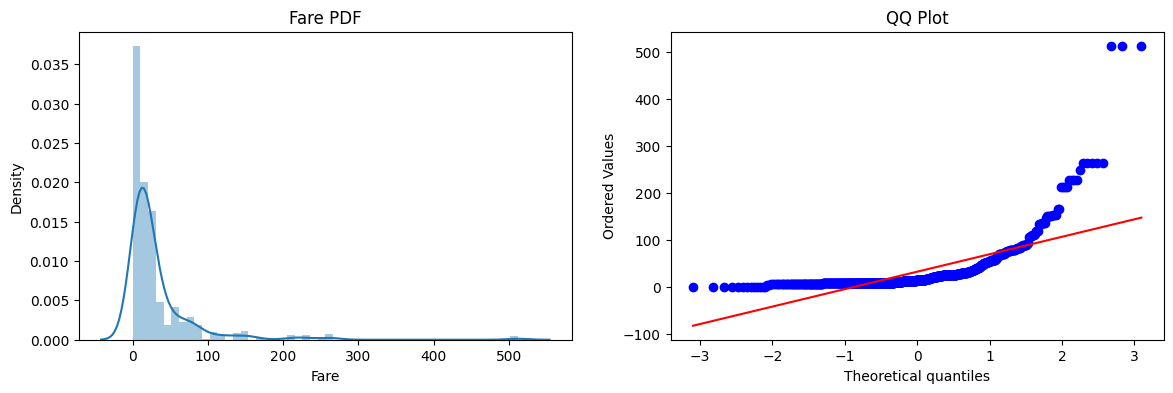

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('QQ Plot')

plt.show()

#Highly Right Skewed

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Creating Obj of both Models

In [19]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)
Y_pred1 = clf2.predict(X_test)

print('Accuracy LR',accuracy_score(Y_test,Y_pred))
print('Accuracy DT',accuracy_score(Y_test,Y_pred1))

Accuracy LR 0.7932960893854749
Accuracy DT 0.770949720670391


c:\Users\bhavs\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
trf = FunctionTransformer(func=np.log1p) #log+1 if zero then ads one and then perform

In [21]:
X_train_transformed = trf.fit_transform(X_train[['Age','Fare']])
X_test_tarnsformed = trf.transform(X_test[['Age','Fare']])

In [22]:
X_train.drop(['Age','Fare'],axis=1,inplace=True)
X_test.drop(['Age','Fare'],axis=1,inplace=True)

In [23]:
X_train_transformed = pd.concat([X_train,X_train_transformed],axis=1)
X_test_tarnsformed = pd.concat([X_test,X_test_tarnsformed],axis=1)

In [24]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

Y_pred = clf.predict(X_test_tarnsformed)
Y_pred1 = clf2.predict(X_test_tarnsformed)

print('Accuracy LR',accuracy_score(Y_test,Y_pred))
print('Accuracy DT',accuracy_score(Y_test,Y_pred1))

Accuracy LR 0.8044692737430168
Accuracy DT 0.7653631284916201
